In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics

df = pd.read_csv('https://query.data.world/s/4ecuwbcpeuhxekuiryr4hjynehcpjw')

In [ ]:
df

,OrganisationLabel,OrganisationURI,PublishedDate,DurationFrom,DurationTo,LatestData,ReportingPeriodType,GeoEntityName,GeoCode,GeoName,GeoURI,Year,EstimatedNumberOfHouseholds,EstimatedNumberOfFuelPoorHouseholds,PercentageOfHouseholdsFuelPoor
0,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2016-01-01T00:00:00,2016-12-31T23:59:59,True,Calendar Year,County,E10000019,Lincolnshire,http://statistics.data.gov.uk/doc/statistical-...,2016,315858,37916,12.0
1,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2016-01-01T00:00:00,2016-12-31T23:59:59,True,Calendar Year,District Council,E07000136,Boston,http://statistics.data.gov.uk/doc/statistical-...,2016,28041,3846,13.7
2,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2016-01-01T00:00:00,2016-12-31T23:59:59,True,Calendar Year,District Council,E07000137,East Lindsey,http://statistics.data.gov.uk/doc/statistical-...,2016,62723,8055,12.8
3,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2016-01-01T00:00:00,2016-12-31T23:59:59,True,Calendar Year,District Council,E07000138,Lincoln,http://statistics.data.gov.uk/doc/statistical-...,2016,41003,5441,13.3
4,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2016-01-01T00:00:00,2016-12-31T23:59:59,True,Calendar Year,District Council,E07000139,North Kesteven,http://statistics.data.gov.uk/doc/statistical-...,2016,47256,4977,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2012-01-01T00:00:00,2012-12-31T23:59:59,NaN,Calendar Year,Lower Super Output Area (LSOA),E01032995,South Holland 006F,http://statistics.data.gov.uk/doc/statistical-...,2012,703,107,15.2
2136,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2012-01-01T00:00:00,2012-12-31T23:59:59,NaN,Calendar Year,Lower Super Output Area (LSOA),E01032996,South Holland 006G,http://statistics.data.gov.uk/doc/statistical-...,2012,552,55,10.0
2137,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2012-01-01T00:00:00,2012-12-31T23:59:59,NaN,Calendar Year,Lower Super Output Area (LSOA),E01032997,South Kesteven 011E,http://statistics.data.gov.uk/doc/statistical-...,2012,484,37,7.6
2138,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2012-01-01T00:00:00,2012-12-31T23:59:59,NaN,Calendar Year,Lower Super Output Area (LSOA),E01032998,South Kesteven 011F,http://statistics.data.gov.uk/doc/statistical-...,2012,494,38,7.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   OrganisationLabel                    2140 non-null   object 
 1   OrganisationURI                      2140 non-null   object 
 2   PublishedDate                        2140 non-null   object 
 3   DurationFrom                         2140 non-null   object 
 4   DurationTo                           2140 non-null   object 
 5   LatestData                           428 non-null    object 
 6   ReportingPeriodType                  2140 non-null   object 
 7   GeoEntityName                        2140 non-null   object 
 8   GeoCode                              2140 non-null   object 
 9   GeoName                              2140 non-null   object 
 10  GeoURI                               2140 non-null   object 
 11  Year                          

"Fuel poverty is defined broadly as the inability to afford an acceptable level of warmth in the home and is determined by three principal factors including the energy efficiency of the property, energy costs, and household income. It is a relatively new concept which has received considerable attention in the UK, but is now also recognised across the world as a particular issue of poverty or deprivation, and often referred to as energy poverty or energy deprivation... The most vulnerable groups to fuel poverty include older people (65 and older), single parents with dependent children, families who are unemployed or on low income, children and young people, pregnant women, people with disabilities, people with existing illnesses and long-term conditions, and single unemployed people... Fuel poverty and living in a cold home is associated with poor physical and mental health. The Marmot Review into the health impacts of cold homes and fuel poverty found a strong association between cold temperatures and cardiovascular and respiratory diseases." - https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-022-12994-4

The above source details what fuel poverty is, and why it is such an import issue to predict and assess. As mentioned, the UK has put the most attention into this issue, so the areas in the data will be from England. I've explained geo names in greater detail later on.

In [ ]:
df.describe() 

,Year,EstimatedNumberOfHouseholds,EstimatedNumberOfFuelPoorHouseholds,PercentageOfHouseholdsFuelPoor
count,2140.000000,2140.000000,2140.000000,2140.000000
mean,2014.000000,2202.933645,249.999533,11.260093
std,1.414544,16176.257476,1845.668006,4.333217
min,2012.000000,417.000000,14.000000,2.200000
25%,2013.000000,614.750000,55.000000,8.275000
50%,2014.000000,732.500000,78.000000,10.700000
75%,2015.000000,881.000000,108.000000,13.600000
max,2016.000000,315858.000000,38964.000000,35.100000


In [ ]:
df.nunique()

OrganisationLabel                        1
OrganisationURI                          1
PublishedDate                            1
DurationFrom                             5
DurationTo                               5
LatestData                               1
ReportingPeriodType                      1
GeoEntityName                            3
GeoCode                                428
GeoName                                428
GeoURI                                 428
Year                                     5
EstimatedNumberOfHouseholds            687
EstimatedNumberOfFuelPoorHouseholds    245
PercentageOfHouseholdsFuelPoor         227
dtype: int64

In [ ]:
df

,OrganisationLabel,OrganisationURI,PublishedDate,DurationFrom,DurationTo,LatestData,ReportingPeriodType,GeoEntityName,GeoCode,GeoName,GeoURI,Year,EstimatedNumberOfHouseholds,EstimatedNumberOfFuelPoorHouseholds,PercentageOfHouseholdsFuelPoor
0,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2016-01-01T00:00:00,2016-12-31T23:59:59,True,Calendar Year,County,E10000019,Lincolnshire,http://statistics.data.gov.uk/doc/statistical-...,2016,315858,37916,12.0
1,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2016-01-01T00:00:00,2016-12-31T23:59:59,True,Calendar Year,District Council,E07000136,Boston,http://statistics.data.gov.uk/doc/statistical-...,2016,28041,3846,13.7
2,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2016-01-01T00:00:00,2016-12-31T23:59:59,True,Calendar Year,District Council,E07000137,East Lindsey,http://statistics.data.gov.uk/doc/statistical-...,2016,62723,8055,12.8
3,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2016-01-01T00:00:00,2016-12-31T23:59:59,True,Calendar Year,District Council,E07000138,Lincoln,http://statistics.data.gov.uk/doc/statistical-...,2016,41003,5441,13.3
4,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2016-01-01T00:00:00,2016-12-31T23:59:59,True,Calendar Year,District Council,E07000139,North Kesteven,http://statistics.data.gov.uk/doc/statistical-...,2016,47256,4977,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2012-01-01T00:00:00,2012-12-31T23:59:59,NaN,Calendar Year,Lower Super Output Area (LSOA),E01032995,South Holland 006F,http://statistics.data.gov.uk/doc/statistical-...,2012,703,107,15.2
2136,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2012-01-01T00:00:00,2012-12-31T23:59:59,NaN,Calendar Year,Lower Super Output Area (LSOA),E01032996,South Holland 006G,http://statistics.data.gov.uk/doc/statistical-...,2012,552,55,10.0
2137,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2012-01-01T00:00:00,2012-12-31T23:59:59,NaN,Calendar Year,Lower Super Output Area (LSOA),E01032997,South Kesteven 011E,http://statistics.data.gov.uk/doc/statistical-...,2012,484,37,7.6
2138,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-10-10T00:00:00,2012-01-01T00:00:00,2012-12-31T23:59:59,NaN,Calendar Year,Lower Super Output Area (LSOA),E01032998,South Kesteven 011F,http://statistics.data.gov.uk/doc/statistical-...,2012,494,38,7.7


There are a lot of unnecessary columns which I will be dropping. The notes for the data specifically state it should not be used to predict trends over time, but by place. This will be a classification problem with many values in play.

In [ ]:
df.isna().any()

OrganisationLabel                      False
OrganisationURI                        False
PublishedDate                          False
DurationFrom                           False
DurationTo                             False
LatestData                              True
ReportingPeriodType                    False
GeoEntityName                          False
GeoCode                                False
GeoName                                False
GeoURI                                 False
Year                                   False
EstimatedNumberOfHouseholds            False
EstimatedNumberOfFuelPoorHouseholds    False
PercentageOfHouseholdsFuelPoor         False
dtype: bool

In [ ]:
df.duplicated().any()

False

In [ ]:
df['LatestData'].isna().sum()

1712

In [ ]:
df.drop(columns= 'OrganisationURI', inplace= True)

In [ ]:
df.drop(columns= 'GeoURI', inplace= True)

I dropped Organisation URI and Geo URI because they're internet links.

In [ ]:
df.drop(columns= 'PublishedDate', inplace= True)

In [ ]:
df.drop(columns= 'DurationFrom', inplace= True)

In [ ]:
df.drop(columns= 'DurationTo', inplace= True)

I dropped Published Date, Duration From, and Duration To because the values are dates, and I am concerned only with Year as far as time is concerned.

In [ ]:
df.drop(columns= 'LatestData', inplace= True)

There is a lot of missing data in this column, and I can tell the latest data by seeing the most recent year.

In [ ]:
df.drop(columns= 'GeoCode', inplace= True)

I dropped Geo Code because there is a Geo Code for every Geo Name, and is therefore redundant.

In [ ]:
df.drop(columns= 'OrganisationLabel', inplace= True)

In [ ]:
df.drop(columns= 'ReportingPeriodType', inplace= True)

I dropped Organisation Label and Reporting Type because there was only one value in all rows for both.

In [ ]:
df

,GeoEntityName,GeoName,Year,EstimatedNumberOfHouseholds,EstimatedNumberOfFuelPoorHouseholds,PercentageOfHouseholdsFuelPoor
0,County,Lincolnshire,2016,315858,37916,12.0
1,District Council,Boston,2016,28041,3846,13.7
2,District Council,East Lindsey,2016,62723,8055,12.8
3,District Council,Lincoln,2016,41003,5441,13.3
4,District Council,North Kesteven,2016,47256,4977,10.5
...,...,...,...,...,...,...
2135,Lower Super Output Area (LSOA),South Holland 006F,2012,703,107,15.2
2136,Lower Super Output Area (LSOA),South Holland 006G,2012,552,55,10.0
2137,Lower Super Output Area (LSOA),South Kesteven 011E,2012,484,37,7.6
2138,Lower Super Output Area (LSOA),South Kesteven 011F,2012,494,38,7.7


In [ ]:
fuel_impoverished = df['PercentageOfHouseholdsFuelPoor'] > 30
fuel_poor = df['PercentageOfHouseholdsFuelPoor'] > 20
df[fuel_impoverished]

,GeoEntityName,GeoName,Year,EstimatedNumberOfHouseholds,EstimatedNumberOfFuelPoorHouseholds,PercentageOfHouseholdsFuelPoor
606,Lower Super Output Area (LSOA),Lincoln 006C,2015,796,266,33.4
969,Lower Super Output Area (LSOA),East Lindsey 017D,2014,515,164,31.8
1856,Lower Super Output Area (LSOA),Lincoln 005B,2012,724,254,35.1
1890,Lower Super Output Area (LSOA),Lincoln 006C,2012,792,255,32.2
2091,Lower Super Output Area (LSOA),West Lindsey 004E,2012,626,196,31.3


In [ ]:
df[fuel_poor]

,GeoEntityName,GeoName,Year,EstimatedNumberOfHouseholds,EstimatedNumberOfFuelPoorHouseholds,PercentageOfHouseholdsFuelPoor
34,Lower Super Output Area (LSOA),Boston 002D,2016,808,167,20.7
94,Lower Super Output Area (LSOA),East Lindsey 014B,2016,880,177,20.1
125,Lower Super Output Area (LSOA),Lincoln 004C,2016,664,154,23.2
144,Lower Super Output Area (LSOA),Lincoln 005B,2016,729,154,21.1
178,Lower Super Output Area (LSOA),Lincoln 006C,2016,799,199,24.9
...,...,...,...,...,...,...
2059,Lower Super Output Area (LSOA),South Kesteven 016C,2012,867,175,20.2
2086,Lower Super Output Area (LSOA),West Lindsey 004A,2012,737,148,20.1
2087,Lower Super Output Area (LSOA),West Lindsey 004B,2012,748,152,20.3
2091,Lower Super Output Area (LSOA),West Lindsey 004E,2012,626,196,31.3


Text(0.5, 1.0, 'Percentage Of Fuel Poor Households by Year')

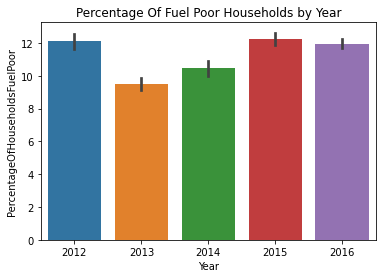

In [ ]:
sns.barplot(data=df, x='Year', y='PercentageOfHouseholdsFuelPoor')

plt.title('Percentage Of Fuel Poor Households by Year')

A trend is shown in the data whereby between 2012 and 2013 there was a 3% drop in fuel poor households, but a 3% rise from 2013 to 2015, and not even a 1% drop by 2016.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

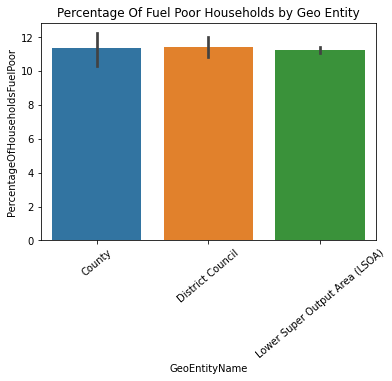

In [ ]:
sns.barplot(data=df, x='GeoEntityName', y='PercentageOfHouseholdsFuelPoor')

plt.title('Percentage Of Fuel Poor Households by Geo Entity')
plt.xticks(rotation = 40)

This shows a very consistent percentage of fuel poor households across geo entities. This becomes more interesting below in my histograms.

Text(0.5, 1.0, 'Percentage Of Fuel Poor Households by Geo Name Over 30% Fuel Poverty')

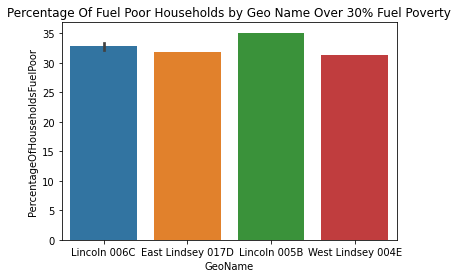

In [ ]:
sns.barplot(data=df[fuel_impoverished], x='GeoName', y='PercentageOfHouseholdsFuelPoor')

plt.title('Percentage Of Fuel Poor Households by Geo Name Over 30% Fuel Poverty')

"The GeoNames database contains over 25,000,000 geographical names corresponding to over 11,800,000 unique features. All features are categorized into one of nine feature classes and further subcategorized into one of 645 feature codes. Beyond names of places in various languages, data stored include latitude, longitude, elevation, population, administrative subdivision and postal codes." - from Wikipedia.

So, what we are looking at is four areas in three cities where around a third of the population is fuel impoverished.

Text(0.5, 1.0, 'Percentage Of Fuel Poor Households by Geo Name Over 30% Fuel Poverty')

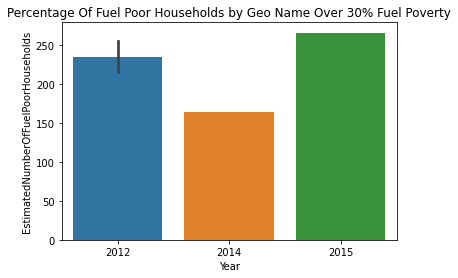

In [ ]:
sns.barplot(data=df[fuel_impoverished], x='Year', y='EstimatedNumberOfFuelPoorHouseholds')

plt.title('Percentage Of Fuel Poor Households by Geo Name Over 30% Fuel Poverty')

This bar graph is still visualizing the values in the most poor areas. While the drop from around 225 fuel poor households per geo name to 175 over the course of two years looks promising, the jump from 175 to 250 over the course of one year is discouraging.

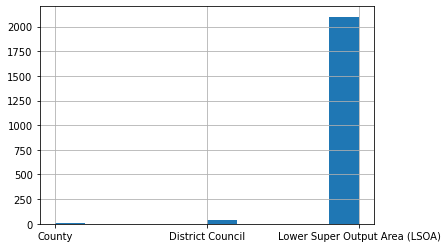

In [ ]:
df['GeoEntityName'].hist()

The data is overwhelmingly from Lower Super Output Areas, which makes the 11% average fuel poverty rating a very strange consistency.

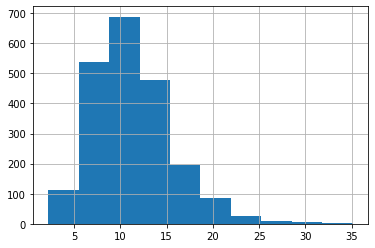

In [ ]:
df['PercentageOfHouseholdsFuelPoor'].hist()

This makes sense, as the average fuel poverty percentage is around 11 percent according to the bar graphs.

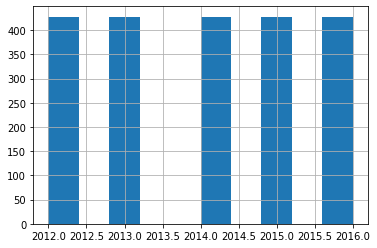

In [ ]:
df['Year'].hist()

The data is distributed very evenly across years.

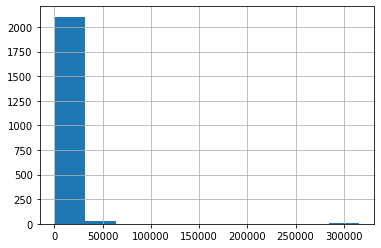

In [ ]:
df['EstimatedNumberOfHouseholds'].hist()

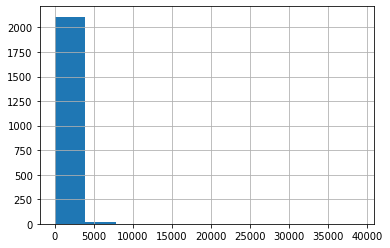

In [ ]:
df['EstimatedNumberOfFuelPoorHouseholds'].hist()

There are an exact amount of entries for both types of household.

In [ ]:
X= df.drop(columns= 'GeoName')
y = df['GeoName']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [ ]:
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')
encoder = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy= 'median')
freq_imputer = SimpleImputer(strategy= 'constant')
cat_proc = make_pipeline(freq_imputer, encoder)
num_tuple = (mean_imputer, num_selector)
cat_tuple = (cat_proc, cat_selector)
col_trans = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [ ]:
def evaluate_classification(y_true, y_test, average=None):
  accuracy = accuracy_score(y_true, y_test)
  recall = recall_score(y_true, y_test, average=average)
  precision = precision_score(y_true, y_test, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision}')

In [ ]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(col_trans, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(strategy='median'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3b7690790>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_t

In [ ]:
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

In [ ]:
print('Training Metrics\n')
evaluate_classification(y_train, knn_train_preds, average='macro')
print('\n')

print('Testing Metrics\n')
evaluate_classification(y_test, knn_test_preds, average='macro')

Training Metrics

Accuracy: 0.4654205607476635 
Recall: 0.43840749414519903 
Precision: 0.42248332918707626


Testing Metrics

Accuracy: 0.15327102803738318 
Recall: 0.1490787269681742 
Precision: 0.11404941373534339


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tree = DecisionTreeClassifier()
tree_pipe = make_pipeline(col_trans, tree)
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(strategy='median'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3b7690790>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_t

In [ ]:
tree_train_preds = tree_pipe.predict(X_train)
tree_test_preds = tree_pipe.predict(X_test)

In [ ]:
print('Training Metrics\n')
evaluate_classification(y_train, tree_train_preds, average='macro')
print('\n')

print('Testing Metrics\n')
evaluate_classification(y_test, tree_test_preds, average='macro')

Training Metrics

Accuracy: 0.9993769470404984 
Recall: 0.9994145199063232 
Precision: 0.9996096799375489


Testing Metrics

Accuracy: 0.18878504672897195 
Recall: 0.17115384615384616 
Precision: 0.15177655677655677


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lr = LogisticRegression()
lr_pipe = make_pipeline(col_trans, lr)
lr_pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(strategy='median'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3b7690790>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_t

In [ ]:
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds = lr_pipe.predict(X_test)

In [ ]:
print('Training Metrics\n')
evaluate_classification(y_train, lr_train_preds, average='macro')
print('\n')

print('Testing Metrics\n')
evaluate_classification(y_test, lr_test_preds, average='macro')

Training Metrics

Accuracy: 0.02367601246105919 
Recall: 0.019242779078844648 
Precision: 0.009543098067688233


Testing Metrics

Accuracy: 0.003738317757009346 
Recall: 0.005747126436781609 
Precision: 0.004310344827586207


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rf = RandomForestClassifier()
rf_pipe = make_pipeline(col_trans, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(strategy='median'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3b7690790>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_t

In [ ]:
rf_train_preds = rf_pipe.predict(X_train)
rf_test_preds = rf_pipe.predict(X_test)

In [ ]:
print('Training Metrics\n')
evaluate_classification(y_train, rf_train_preds, average='macro')
print('\n')

print('Testing Metrics\n')
evaluate_classification(y_test, rf_test_preds, average='macro')

Training Metrics

Accuracy: 0.9993769470404984 
Recall: 0.9995316159250586 
Precision: 0.9995316159250586


Testing Metrics

Accuracy: 0.037383177570093455 
Recall: 0.03243021346469622 
Precision: 0.03694581280788178


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tree_params = {'decisiontreeclassifier__max_depth' : [5, 10, 20, 50], 'decisiontreeclassifier__max_features' : [2, 4, 6, 8]}

tree_gs = GridSearchCV(tree_pipe, tree_params)
tree_gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_p

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('simpleimputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3b7690790>),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                          

In [ ]:
tree_gs.best_params_

{'decisiontreeclassifier__max_depth': 50,
 'decisiontreeclassifier__max_features': 6}

In [ ]:
tree_params_2 = {'decisiontreeclassifier__max_depth' : [50, 100, 150, 200], 'decisiontreeclassifier__max_features' : [5, 6, 7, 8]}

tree_gs_2 = GridSearchCV(tree_pipe, tree_params_2)
tree_gs_2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_p

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('simpleimputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3b7690790>),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                          

In [ ]:
tree_gs_2.best_params_

{'decisiontreeclassifier__max_depth': 150,
 'decisiontreeclassifier__max_features': 7}

In [ ]:
tree_2 = DecisionTreeClassifier(max_depth= 150, max_features= 7)
tree_pipe_2 = make_pipeline(col_trans, tree_2)
tree_pipe_2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(strategy='median'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3b7690790>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_t

In [ ]:
tree_train_preds_2 = tree_pipe_2.predict(X_train)
tree_test_preds_2 = tree_pipe_2.predict(X_test)

In [ ]:
print('Training Metrics\n')
evaluate_classification(y_train, tree_train_preds_2, average='macro')
print('\n')

print('Testing Metrics\n')
evaluate_classification(y_test, tree_test_preds_2, average='macro')

Training Metrics

Accuracy: 0.9993769470404984 
Recall: 0.9994145199063232 
Precision: 0.9996096799375489


Testing Metrics

Accuracy: 0.19065420560747665 
Recall: 0.16902313624678664 
Precision: 0.1581650140776105


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
